In [3]:
    %pylab inline
import numpy
import warnings
warnings.filterwarnings("ignore")
import nolearn
from nolearn.lasagne import NeuralNet
import readdata
import lasagne
from lasagne import layers
from sklearn import metrics
import detectobjects as det
import os.path
from scipy import misc
import cv2
from progress_bar import ProgressBar
import shapefeatures
from sklearn import ensemble

Populating the interactive namespace from numpy and matplotlib


/home/kalimuthu/tensor1/local/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
opts = {'img_dir': 'data/intestinalparasites/images/',
        'models_dir': 'models/',
        'annotation_dir': 'data/intestinalparasites/annotation/',
        'detection_probability_threshold': 0.9,
        'detection_overlap_threshold': 0.3, 
        'gauss': 1,
        'patch_size': (600,600),
        'image_downsample' : 10,
        'detection_step': 5,
        'patch_creation_step': 40,
        'object_class': None,
        'negative_training_discard_rate': .9
       }
opts['patch_stride_training'] = int(opts['patch_size'][0]*.25)

In [5]:
trainfiles, valfiles, testfiles = readdata.create_sets(opts['img_dir'], train_set_proportion=.5, 
                                                  test_set_proportion=.5,
                                                  val_set_proportion=.1)

train_y, train_X = readdata.create_patches(trainfiles, opts['annotation_dir'], opts['img_dir'], opts['patch_size'][0], opts['patch_stride_training'], grayscale=False, progressbar=True, downsample=opts['image_downsample'], objectclass=opts['object_class'], negative_discard_rate=opts['negative_training_discard_rate'])
test_y, test_X = readdata.create_patches(testfiles,  opts['annotation_dir'], opts['img_dir'], opts['patch_size'][0], opts['patch_stride_training'], grayscale=False, progressbar=True, downsample=opts['image_downsample'], objectclass=opts['object_class'], negative_discard_rate=opts['negative_training_discard_rate'])
val_y, val_X = readdata.create_patches(valfiles, opts['annotation_dir'], opts['img_dir'], opts['patch_size'][0], opts['patch_stride_training'], grayscale=False, progressbar=True, downsample=opts['image_downsample'], objectclass=opts['object_class'], negative_discard_rate=opts['negative_training_discard_rate'])

# Cut down on disproportionately large numbers of negative patches
train_X, train_y = readdata.balance(train_X, train_y, mult_neg=100)
test_X, test_y = readdata.balance(test_X, test_y, mult_neg=100)
val_X, val_y = readdata.balance(val_X, val_y, mult_neg=100)

# Create rotated and flipped versions of the positive patches
train_X, train_y = readdata.augment_positives(train_X, train_y)
val_X, val_y = readdata.augment_positives(val_X, val_y)

print '\n'
print '%d positive training examples, %d negative training examples' % (sum(train_y), len(train_y)-sum(train_y))
print '%d positive testing examples, %d negative testing examples' % (sum(test_y), len(test_y)-sum(test_y))
print '%d patches (%.1f%% positive)' % (len(train_y)+len(test_y), 100.*((sum(train_y)+sum(test_y))/(len(train_y)+len(test_y))))

print '%d validation positive training examples, %d validation negative training examples' % (sum(val_y), len(val_y)-sum(val_y))

print '%d patches (%.1f%% positive)' % (len(train_y)+len(test_y)+len(val_y), 100.*((sum(train_y)+sum(test_y)+sum(val_y))/(len(train_y)+len(test_y)+len(val_y))))


('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('te

('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 17)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 17)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0f8680>, None)
('test1:', 17)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61fc0943b0>, None)
('test1:', 18)
('\r

View a random selection of positive and negative patches to see if they look right

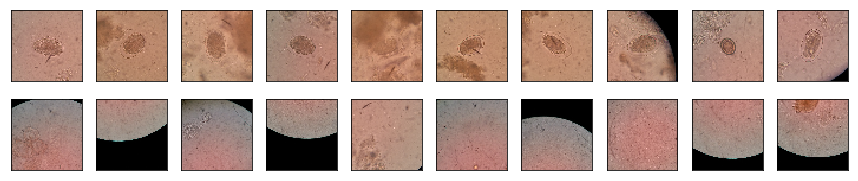

In [8]:
N_samples_to_display = 10
pos_indices = np.where(train_y)[0]
pos_indices = pos_indices[np.random.permutation(len(pos_indices))]
for i in range(N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_pos = train_X[pos_indices[i],:,:,:]
    example_pos = np.swapaxes(example_pos,0,2)
    plt.imshow(example_pos)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')    

neg_indices = np.where(train_y==0)[0]
neg_indices = neg_indices[np.random.permutation(len(neg_indices))]
for i in range(N_samples_to_display,2*N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_neg = train_X[neg_indices[i],:,:,:]
    example_neg = np.swapaxes(example_neg,0,2)
    plt.imshow(example_neg)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')
plt.gcf().set_size_inches(1.5*N_samples_to_display,3)

### CNN training

In [15]:
def CNN(n_epochs):
    net1 = NeuralNet(
        layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),      #Convolutional layer.  Params defined below
        ('pool1', layers.MaxPool2DLayer),   # Like downsampling, for execution speed
        ('lstm', layers.LSTMLayer),
        ('output', layers.DenseLayer),
        ],
        
    input_shape=(None, 3, opts['patch_size'][0]/opts['image_downsample'], 
                 opts['patch_size'][0]/opts['image_downsample']),
    conv1_num_filters=7, 
    conv1_filter_size=(5, 5), 
    conv1_nonlinearity=lasagne.nonlinearities.rectify,
        
    pool1_pool_size=(2, 2),
        
    lstm_num_units=100,   

    output_num_units=2, 
    output_nonlinearity=lasagne.nonlinearities.softmax,

    update_learning_rate=0.0001,
    update_momentum=0.9,

    max_epochs=n_epochs,
    verbose=1,
    )
    return net1

cnn = CNN(5).fit(train_X, train_y)
cnn.load_weights_from('parasites1.hdf5')

# Neural Network with 356234 learnable parameters

## Layer information

  #  name    size
---  ------  -------
  0  input   3x60x60
  1  conv1   7x56x56
  2  pool1   7x28x28
  3  lstm    7x100
  4  output  2

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  -----
      1     0.75044     0.72487    1.03527      0.50000  3.23s
      2     0.68796     0.67847    1.01400      0.60067  3.32s
      3     0.65069     0.66282    0.98169      0.60403  3.30s
      4     0.61822     0.63024    0.98093      0.65436  3.30s
      5     0.59512     0.61505    0.96760      0.69463  3.36s
Loaded parameters to layer 'conv1' (shape 7x3x5x5).
Loaded parameters to layer 'conv1' (shape 7).
Loaded parameters to layer 'lstm' (shape 784x100).
Loaded parameters to layer 'lstm' (shape 100x100).
Loaded parameters to layer 'lstm' (shape 100).
Loaded parameters to layer 'lstm' (shape 784x100).
Loaded parameters to layer 'lstm' (shape 100x100).
Lo

### Make predictions and evaluate on test data

In [16]:
from sklearn.metrics import confusion_matrix
y_predicted = cnn.predict(test_X)
print(confusion_matrix(test_y, y_predicted))
y_pred = cnn.predict_proba(test_X)
np.savetxt("predicted.txt",y_predicted,fmt="%01d")
np.savetxt("exact.txt",test_y,fmt="%01d")

[[825  28]
 [  6  71]]


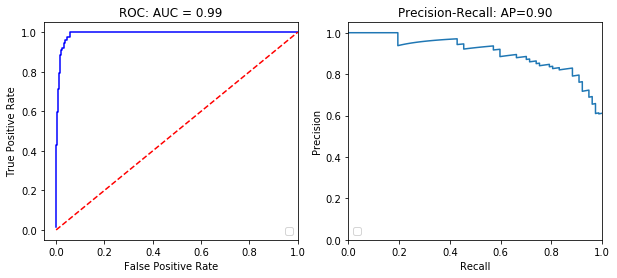

In [17]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(test_y, y_pred[:,1])
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

precision, recall, thresholds = metrics.precision_recall_curve(test_y, y_pred[:,1])
average_precision = metrics.average_precision_score(test_y, y_pred[:, 1])

subplot(121)
plt.title('ROC: AUC = %0.2f'% roc_auc)
plt.plot(false_positive_rate, true_positive_rate, 'b')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylim([-.05, 1.05])
plt.xlim([-.05, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

subplot(122)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")

plt.gcf().set_size_inches(10,4)

#plt.savefig('figs/plasmodium-patchevaluation.png', bbox_inches='tight')

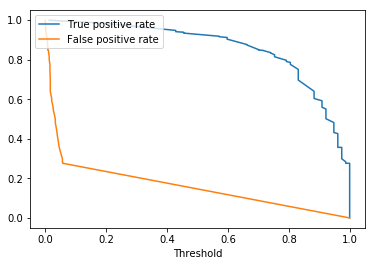

In [18]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(test_y, y_pred[:,1])
true_positive_rate.shape, thresholds.shape
plt.plot(true_positive_rate, thresholds,label='True positive rate')
plt.plot(false_positive_rate, thresholds, label='False positive rate')
plt.xlabel('Threshold')
plt.legend(loc='upper left')

**Examine mistakes to understand network performance: false positives.** 

Find the negative-labelled patches with highest prediction score

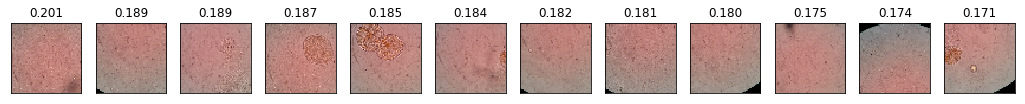

In [19]:
neg_indices = np.where(test_y==0)[0]
neg_scores = y_pred[neg_indices,1]
neg_indices = neg_indices[neg_scores.argsort()]
neg_indices = neg_indices[::-1]

neg_scores = y_pred[neg_indices,1]

N_samples_to_display = 12
offset = 55
for i in range(N_samples_to_display,2*N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_neg = test_X[neg_indices[i+offset],:,:,:]
    example_neg = np.swapaxes(example_neg,0,2)
    plt.imshow(example_neg)
    plt.title('%.3f' % neg_scores[i+offset])
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')    

plt.gcf().set_size_inches(1.5*N_samples_to_display,3) 

plt.savefig('figs/plasmodium-falsedetections.png', bbox_inches='tight')

See highest-scored test patches

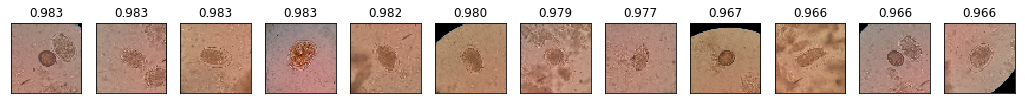

In [20]:
prob_range = [.95,1.]

tmp_scores = y_pred.copy()[:,1]
tmp_scores[tmp_scores<prob_range[0]] = -1
tmp_scores[tmp_scores>prob_range[1]] = -1

pos_indices = tmp_scores.argsort()
pos_indices = pos_indices[::-1]

N_samples_to_display = 12
offset = 0
for i in range(N_samples_to_display,2*N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_neg = test_X[pos_indices[i+offset],:,:,:]
    example_neg = np.swapaxes(example_neg,0,2)
    plt.imshow(example_neg)
    plt.title('%.3f' % (tmp_scores[pos_indices[i+offset]]))
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')    

plt.gcf().set_size_inches(1.5*N_samples_to_display,3) 

plt.savefig('figs/plasmodium-detectedpatches.png', bbox_inches='tight')

See lowest scored test patches

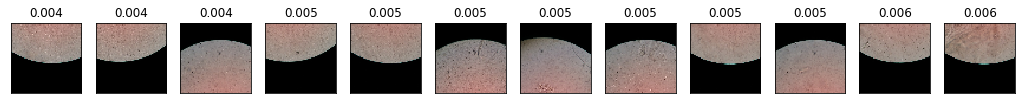

In [21]:
pos_indices = y_pred[:,1].argsort()

N_samples_to_display = 12

for i in range(N_samples_to_display,2*N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_neg = test_X[pos_indices[i],:,:,:]
    example_neg = np.swapaxes(example_neg,0,2)
    plt.imshow(example_neg)
    plt.title('%.3f' % (y_pred[pos_indices[i],1]))
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')    

plt.gcf().set_size_inches(1.5*N_samples_to_display,3) 

plt.savefig('figs/plasmodium-testpatches-lowprob.png', bbox_inches='tight')

### Example of objects detected in an entire image

The white boxes represent annotations in the training data. Red boxes are detections by the convnet.

(1161, 2064, 3, 5, 232.2)


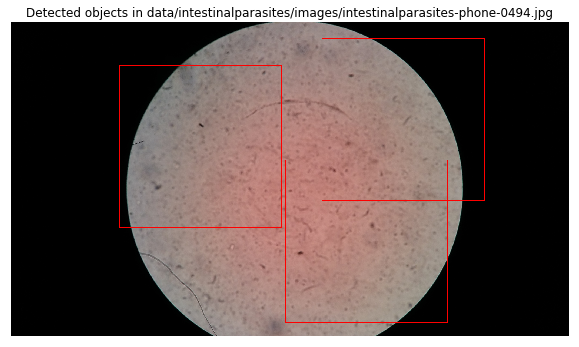

In [22]:
reload(det)

fname = testfiles[24]
imfile = opts['img_dir'] + fname
opts['detection_threshold'] = 0.5
found = det.detect(imfile, cnn, opts)

im = misc.imread(imfile)

plt.box(False)
plt.xticks([])
plt.yticks([])

annofile = opts['annotation_dir'] + fname[:-3] + 'xml'
bboxes = readdata.get_bounding_boxes_for_single_image(annofile)
for bb in bboxes:
    bb = bb.astype(int)
    cv2.rectangle(im, (bb[0],bb[2]), (bb[1],bb[3]), (255,255,255), 2)  

for f in found:
    f = f.astype(int)
    cv2.rectangle(im, (f[0],f[1]), (f[2],f[3]), (255,0,0), 2)

plt.gcf().set_size_inches(10,10)
plt.title('Detected objects in %s' % (imfile))
plt.imshow(im)

#cv2.imwrite('detectionimages/detected-' + os.path.basename(imfile),im)

### Evaluation: compare with classification based on morphological feature extraction

In [23]:
featureset = [3,7,11,12,15,17]
centiles = [0,25,50,75,100]

pb = ProgressBar(train_X.shape[0])
train_X_f = []
for i in range(train_X.shape[0]):
    if i % 100 == 0:
        pb.step(i)
    graypatch = cv2.cvtColor(np.swapaxes(train_X[i,:,:,:],0,2).astype('uint8'), cv2.COLOR_BGR2GRAY)
    train_X_f.append(shapefeatures.extract(graypatch,attributes=featureset,centiles=centiles, momentfeatures=True))
train_X_f = np.vstack(train_X_f)

test_X_f = []
for i in range(test_X.shape[0]):
    if i % 100 == 0:
        pb.step(i)
    graypatch = cv2.cvtColor(np.swapaxes(test_X[i,:,:,:],0,2).astype('uint8'), cv2.COLOR_BGR2GRAY)
    test_X_f.append(shapefeatures.extract(graypatch,attributes=featureset,centiles=centiles, momentfeatures=True))
test_X_f = np.vstack(test_X_f)

('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f61e10a5440>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f61e10a5440>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f61e10a5440>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61e10a5440>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61e10a5440>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61e10a5440>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61e10a5440>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61e10a5440>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61e10a5440>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61e10a5440>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61e10a5440>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f61e10a5440>, None)
('te

In [24]:
clf = ensemble.ExtraTreesClassifier(n_estimators=100, max_depth=5, n_jobs=-1)
clf.fit(train_X_f, train_y)
y_pred_CLF = clf.predict_proba(test_X_f)

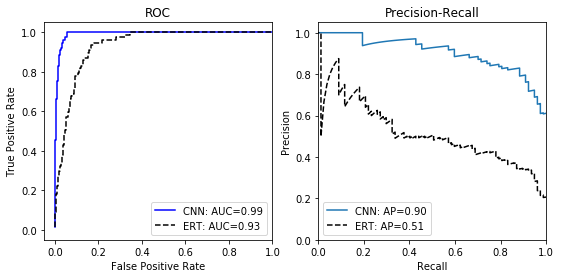

In [30]:
false_positive_rate_CNN, true_positive_rate_CNN, thresholds_CNN = metrics.roc_curve(test_y, y_pred[:,1])
roc_auc_CNN = metrics.auc(false_positive_rate_CNN, true_positive_rate_CNN)

precision_CNN, recall_CNN, thresholds_CNN = metrics.precision_recall_curve(test_y, y_pred[:,1])
average_precision_CNN = metrics.average_precision_score(test_y, y_pred[:, 1])

false_positive_rate_CLF, true_positive_rate_CLF, thresholds_CLF = metrics.roc_curve(test_y, y_pred_CLF[:,1])
roc_auc_CLF = metrics.auc(false_positive_rate_CLF, true_positive_rate_CLF)

precision_CLF, recall_CLF, thresholds_CLF = metrics.precision_recall_curve(test_y, y_pred_CLF[:,1])
average_precision_CLF = metrics.average_precision_score(test_y, y_pred_CLF[:, 1])

subplot(121)
plt.title('ROC' )
plt.plot(false_positive_rate_CNN, true_positive_rate_CNN, 'b', label='CNN: AUC=%.2f' % (roc_auc_CNN))
plt.plot(false_positive_rate_CLF, true_positive_rate_CLF, 'k--', label='ERT: AUC=%.2f' % (roc_auc_CLF))
plt.legend(loc='lower right')
plt.ylim([-.05, 1.05])
plt.xlim([-.05, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

subplot(122)
plt.plot(recall_CNN, precision_CNN, label='CNN: AP=%.2f' % (average_precision_CNN))
plt.plot(recall_CLF, precision_CLF,'k--', label='ERT: AP=%.2f' % (average_precision_CLF))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall')
plt.legend(loc="lower left")

plt.gcf().set_size_inches(9,4)

plt.savefig('figs/plasmodium-patchevaluation.png', bbox_inches='tight')

In [26]:
#cnn.save_weights_to('parasites1.hdf5')

In [27]:
cnn=CNN(500)
cnn.load_weights_from('parasites1.hdf5')

Loaded parameters to layer 'conv1' (shape 7x3x5x5).
Loaded parameters to layer 'conv1' (shape 7).
Loaded parameters to layer 'lstm' (shape 784x100).
Loaded parameters to layer 'lstm' (shape 100x100).
Loaded parameters to layer 'lstm' (shape 100).
Loaded parameters to layer 'lstm' (shape 784x100).
Loaded parameters to layer 'lstm' (shape 100x100).
Loaded parameters to layer 'lstm' (shape 100).
Loaded parameters to layer 'lstm' (shape 784x100).
Loaded parameters to layer 'lstm' (shape 100x100).
Loaded parameters to layer 'lstm' (shape 100).
Loaded parameters to layer 'lstm' (shape 784x100).
Loaded parameters to layer 'lstm' (shape 100x100).
Loaded parameters to layer 'lstm' (shape 100).
Loaded parameters to layer 'lstm' (shape 100).
Loaded parameters to layer 'lstm' (shape 100).
Loaded parameters to layer 'lstm' (shape 100).
Loaded parameters to layer 'lstm' (shape 1x100).
Loaded parameters to layer 'lstm' (shape 1x100).
Loaded parameters to layer 'output' (shape 700x2).
Loaded parameter